# I. Introduction

- Nama: Cylia Wardana

- Batch: HCK - 004

### Problem Statement

Untuk mengetahui tingkat loyalitas customer terhadap produk yang ditawarkan oleh perusahaan

### Objective

Tingkat loyalitas customer terhadap suatu perusahaan merupakan suatu hal yang penting. Hal ini mempengaruhi pendapatan serta kontinuitas dari perusahaan tersebut untuk berjalan. Selain itu, perusahaan dapat menentukan program yang sesuai untuk menarik minat customer terhadap perusahaan tersebut. Dengan persaingan yang ketat, perusahaan perlu mengutamakan kepuasaan customer untuk mampu bertahan/survive dalam bisnis, dan salah satu indikator dari kesuksesan suatu perusahaan adalah loyalitas dari customer mereka.


# II. Import Libraries

In [1]:
!pip install phik
!pip install feature_engine
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 17.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#korelasi
import phik

#multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

#pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

#saving
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

In [22]:
#upload file csv ke google colab
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn (1).csv


In [23]:
#load data dan cek non-standard missing values
missing_values = ["n/a", "na", "--",'?',' nan', 'no',' ?','NaN','nan']
data = pd.read_csv('churn.csv',na_values=missing_values)

Load data dan cek apabila terdapat non-standard missing values

In [24]:
#buat copy dari data
df = data.copy()

In [25]:
#penjabaran seluruh kolom
pd.set_option('display.max.columns',None)

Menjabarkan seluruh (nama) kolom agar dapat terlihat pada dataset

In [7]:
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


Menampilkan 5 baris/rows pertama

In [8]:
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


Menampilkan 5 baris/rows terakhir

In [9]:
#melihat baris yang duplikat
df.duplicated().sum()

18

Terdapat 18 baris (berisikan informasi user) yang terduplikasi

In [10]:
#menghapus baris yang terduplikasi
df.drop_duplicates(inplace=True)

Menghilangkan baris yang terduplikasi menggunakan drop_duplicates

In [11]:
df.duplicated().sum()

0

Sudah tidak ada baris informasi yang sama/duplikasi

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

Kolom joining_date memiliki tipe data yang tidak sesuai (tipe data yang seharusnya = datetime)

In [26]:
#mengganti tipe data kolom joining_date menjadi datetime
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

Semua kolom sudah memiliki tipe data yang sesuai

In [15]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Terdapat missing values pada kolom gender sebanyak 59, kolom region_category sebanyak 5428, kolom joined_through_referral sebanyak 5438, kolom preferred_offer_types sebanyak 288 dan kolom medium_of_operation sebanyak 5393

In [16]:
#menghitung persentase missing value
for i in df.columns:
    if df[i].isnull().sum()>0:
        print('Persentase missing value dari',i,"=",round(df[i].isnull().sum()*100/df.shape[0],2),"%")

Persentase missing value dari gender = 0.16 %
Persentase missing value dari region_category = 14.67 %
Persentase missing value dari joined_through_referral = 14.7 %
Persentase missing value dari preferred_offer_types = 0.78 %
Persentase missing value dari medium_of_operation = 14.58 %


Data diatas menunjukkan persentase missing value pada kolom-kolom yang terdapat missing value.

- Untuk kolom-kolom yang missing values-nya dibawah 5% akan dihilangkan / di-remove (kolom gender dan kolom preferred_offer_types)
- Untuk kolom-kolom yang missing values-nya diatas 5%, missing values akan digantikan dengan modus / mode nya karena tipe datanya adalah object/kategori (kolom region_category, kolom joined_through_referral, dan kolom medium_of_operation), hal ini dilakukan karena apabila semua missing value pada kolom-kolom ini dihilangkan, nantinya akan mempengaruhi distribusi datanya
- Untuk kolom-kolom dengan missing values diatas 5%, menurut asumsi saya masuk ke dalam kategori missing value MCAR (Missing Completely At Random) (contoh: Sebuah studi kesehatan yang meminta responden untuk memberikan data tentang riwayat kesehatan mereka. Namun, beberapa responden mungkin tidak mengisi survei karena kesalahan teknis pada aplikasi survei) dikarenakan jumlah missing values nya rata-rata sama yaitu kisaran 5300-5400, hal ini mungkin bisa terjadi karena adanya kesalahan pada sistem saat user ingin melakukan penginputan pada kolom-kolom tersebut

In [17]:
df.dropna(subset=['gender','preferred_offer_types'],inplace=True)

Menghilangkan semua missing values pada kolom gender dan preferred_offer_types

In [18]:
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])

Mengganti semua missing values pada kolom region_category, joined_through_referral, dan medium_of_operation menjadi nilai mode/modus dari kolom tersebut

In [19]:
df.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

Sudah tidak ada missing values pada dataset

# IV. Exploratory Data Analysis (EDA)

In [20]:
df.shape

(36646, 22)

Terdapat 36646 baris/rows dan 22 kolom pada dataset ini (setelah dilakukan dropna)

In [21]:
#numerical feature describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36646.0,37.115511,15.871279,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36646.0,-41.955957,228.913891,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36646.0,279.118857,329.850217,0.00,60.0875,161.770,356.3525,3235.578521
avg_transaction_value,36646.0,29276.226579,19448.891993,800.46,14177.8350,27563.715,40860.4375,99914.050000
avg_frequency_login_days,36646.0,14.655780,9.471645,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36646.0,623.646095,270.163457,0.00,574.2125,680.415,757.0375,2069.069761
churn_risk_score,36646.0,0.541041,0.498320,0.00,0.0000,1.000,1.0000,1.000000


- Pada data diatas dapat terlihat nilai rata-rata dari masing-masing kolom, seperti rata-rata umur user yang melakukan transaksi adalah 37 tahun, rata-rata waktu dan spending yang dihabiskan user pada website tersebut adalah 279 menit dan 29276 dollar, rata-rata banyaknya user melakukan log in pada website adalah 14 kali, dan rata-rata points yang user dapatkan adalah 623 points
- Terlihat adanya kejanggalan pada kolom days_since_last_login (lama waktu user akan login kembali ke website dari login terakhir mereka) karena nilainya negatif

In [22]:
df.days_since_last_login.unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   15,    6,   22,   16,   13,   18,   25, -999,
         24,   23,    1,   21,   26])

Setelah dicek pada kolom ini ternyata terdapat angka -999 yang membuat keseluruhan nilai rata-rata menjadi negatif

In [23]:
df[df['days_since_last_login']==-999]['churn_risk_score'].value_counts()

1    1102
0     880
Name: churn_risk_score, dtype: int64

Total keseluruhan data dengan nilai -999 ada 1982 dimana untuk user yang diprediksi akan churn (1) ada sebanyak 1102 dan not churn (0) sebanyak 880

In [24]:
df[df['days_since_last_login']==-999].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1982.0,37.393037,16.015780,10.00,23.000,38.000,51.0000,64.000000
days_since_last_login,1982.0,-999.000000,0.000000,-999.00,-999.000,-999.000,-999.0000,-999.000000
avg_time_spent,1982.0,275.672582,319.696165,0.00,60.665,165.780,349.6825,2341.451934
avg_transaction_value,1982.0,28931.609006,19468.447091,840.34,13787.630,27176.575,40401.7100,99530.860000
avg_frequency_login_days,1982.0,14.702105,9.390537,0.00,8.000,14.000,22.0000,73.061995
points_in_wallet,1982.0,624.114301,263.741770,0.00,565.495,673.110,753.7000,1755.094693
churn_risk_score,1982.0,0.556004,0.496979,0.00,0.000,1.000,1.0000,1.000000


Setelah dilihat lebih dalam, semua data tersebut tidak ada yang aneh (normal), maka untuk data ini tidak akan diubah dan nantinya juga akan dilihat korelasinya apakah fitur ini bisa dipakai atau tidak

In [25]:
#membuat list kolom numerik untuk keperluan eda
numlist_eda = ['age','days_since_last_login', 
           'avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

#membuat list kolom kategori untuk keperluan eda
catlist_eda = ['user_id',
            'gender',
            'region_category',
            'membership_category',
            'joining_date',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'last_visit_time',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

In [26]:
#categorical feature describe
df[catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,36646,36646,9f420209e7d129f3,1,NaT,NaT
gender,36646,2,F,18348,NaT,NaT
region_category,36646,3,Town,19367,NaT,NaT
membership_category,36646,6,Basic Membership,7648,NaT,NaT
joining_date,36646,1096,2015-06-02 00:00:00,55,2015-01-01,2017-12-31
joined_through_referral,36646,2,No,21093,NaT,NaT
preferred_offer_types,36646,3,Gift Vouchers/Coupons,12322,NaT,NaT
medium_of_operation,36646,3,Desktop,19120,NaT,NaT
internet_option,36646,3,Wi-Fi,12290,NaT,NaT
last_visit_time,36646,29876,07:56:41,6,NaT,NaT


Pada data kategorikal diatas, dapat terlihat karakteristik user yang melakukan transaksi pada website, dimana jenis kelamin user yang paling sering melakukan transaksi adalah perempuan, user paling banyak tinggal di kota dan rata-rata masih menjadi basic membership, namun hal yang perlu diperhatikan yaitu untuk feedbacknya dimana feedback yang paling sering muncul yaitu poor product quality / kualitas produk yang buruk dimana hal ini dapat mempengaruhi apakah seorang user dapat berhenti bertransaksi pada website sehingga merugikan perusahaan.

[Text(0, 0, '16819'), Text(0, 0, '19827')]

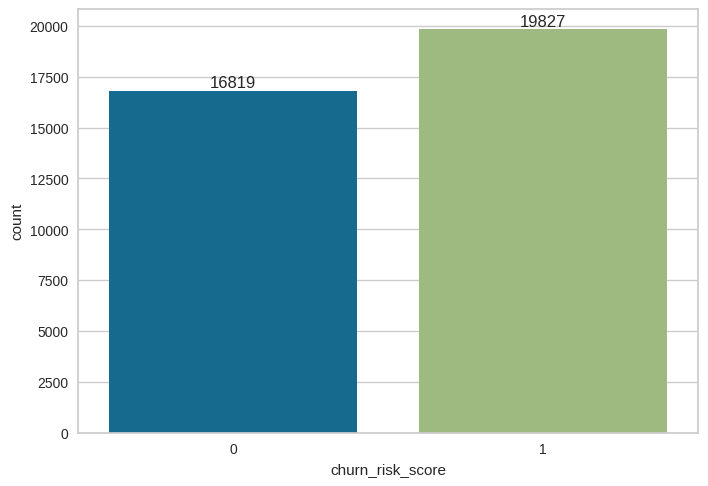

In [27]:
#membuat bar graph
a = sns.countplot(data=df, x='churn_risk_score')
a.bar_label(a.containers[0])

Keterangan:
- 0 = Not Churn (Tidak Berhenti)
- 1 = Churn (Berhenti)

Terlihat pada grafik diatas bahwa pada dataset ini, lebih banyak user yang churn/berhenti memakai produk (sebanyak 19827) daripada user yang tetap menggunakan produk / not churn (sebanyak 16819)

<Axes: ylabel='churn_risk_score'>

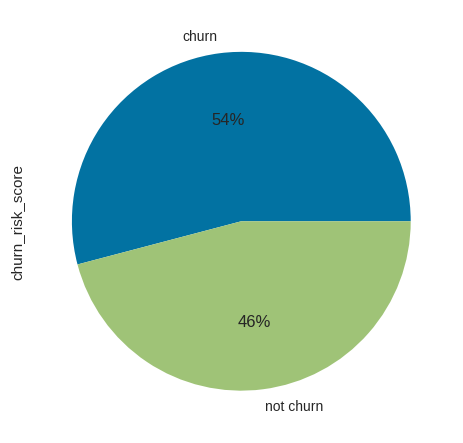

In [28]:
#membuat pie chart
df.churn_risk_score.value_counts().plot(kind='pie',autopct='%0.0f%%',labels=['churn','not churn'])

Terlihat dari pie chart diatas, persentase user yang churn dan tidak churn yaitu sebanyak 54% dan 46% secara berurutan. Dikarenakan perbedaan antara keduanya hanya 8% (dibawah 10%), bisa dikatakan bahwa kolom target (churn_risk_score) ini balance.

Text(0.5, 1.0, 'points_in_wallet')

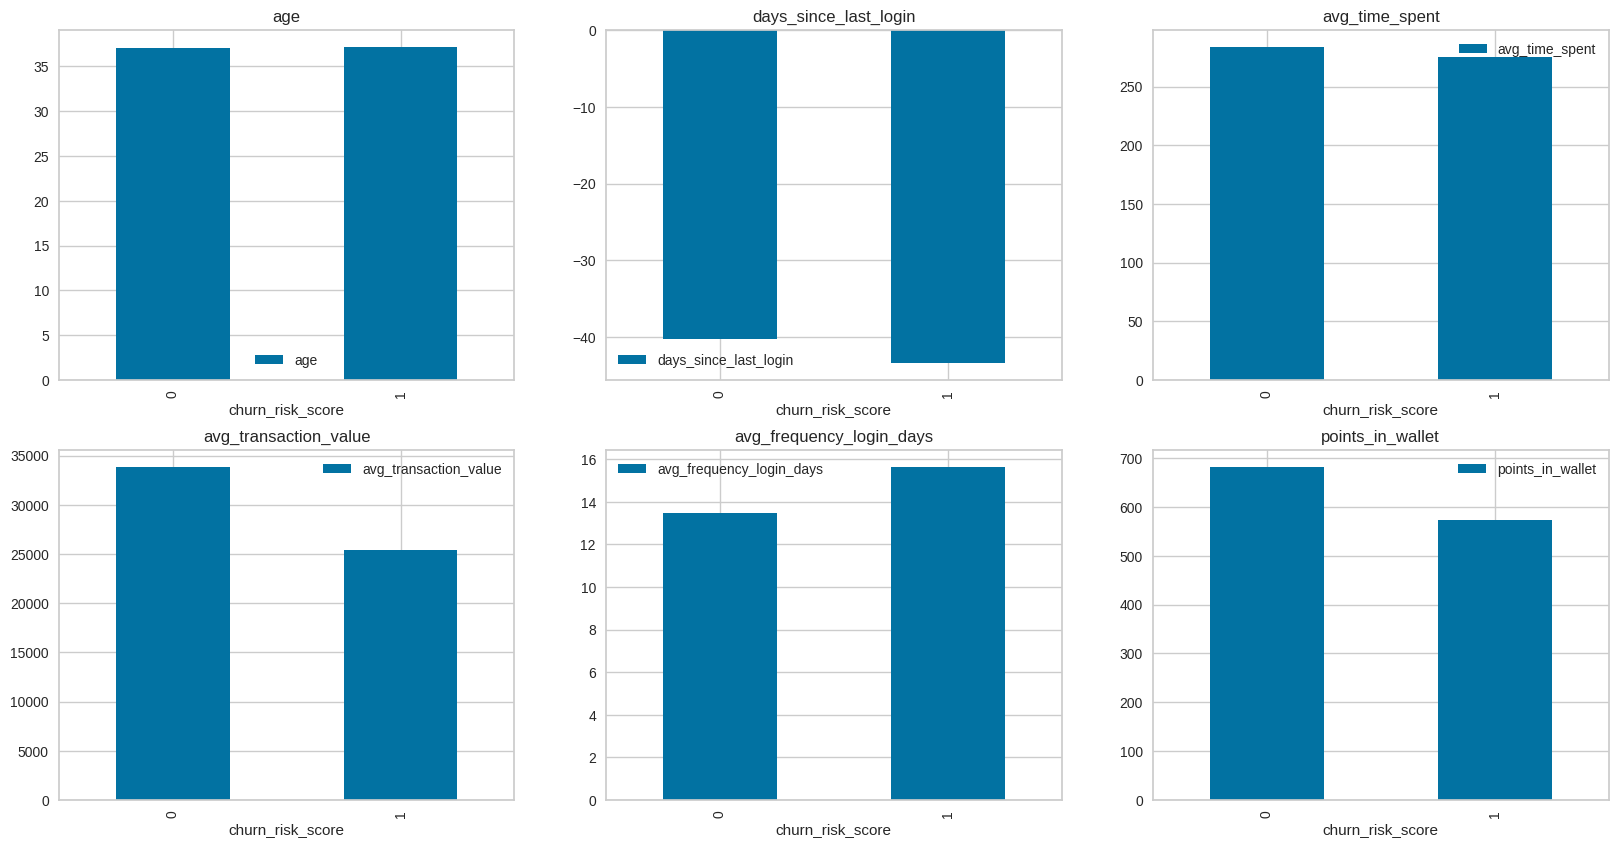

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
df.groupby('churn_risk_score')[['age']].mean().plot(kind='bar',ax=axs[0, 0])
axs[0, 0].set_title('age')
df.groupby('churn_risk_score')[['days_since_last_login']].mean().plot(kind='bar',ax=axs[0, 1])
axs[0, 1].set_title('days_since_last_login')
df.groupby('churn_risk_score')[['avg_time_spent']].mean().plot(kind='bar',ax=axs[0, 2])
axs[0, 2].set_title('avg_time_spent')
df.groupby('churn_risk_score')[['avg_transaction_value']].mean().plot(kind='bar',ax=axs[1, 0])
axs[1, 0].set_title('avg_transaction_value')
df.groupby('churn_risk_score')[['avg_frequency_login_days']].mean().plot(kind='bar',ax=axs[1, 1])
axs[1, 1].set_title('avg_frequency_login_days')
df.groupby('churn_risk_score')[['points_in_wallet']].mean().plot(kind='bar',ax=axs[1, 2])
axs[1, 2].set_title('points_in_wallet')

- Terlihat pada bar graph diatas bahwa semakin tinggi nilai transaksinya, maka kemungkinan seorang user akan berhenti menggunakan produk (churn) akan semakin rendah (avg_transaction_value)

- Pada grafik avg_frequency_login_days, terlihat bahwa user pada kelas 0 (not churn) malah memiliki rata-rata jumlah login yang lebih sedikit daripada kelas 1 (churn), dimana hal ini sedikit janggal karena seharusnya user pada kelas 0 lebih banyak login karena lebih sering menggunakan website. Namun hal ini bisa juga terjadi karena jumlah user pada kelas 1 lebih banyak daripada kelas 0 sehingga menaikkan jumlah rata-rata login pada kelas 1

- Points yang didapatkan user pada kelas 0 (not churn) lebih banyak daripada user pada kelas 1 (churn), hal ini dapat disebabkan karena user 0 lebih sering berbelanja pada website sehingga dapat mengumpulkan points lebih banyak
- Pada grafik juga terlihat user 0 lebih banyak menghabiskan waktu pada website daripada user 1 walaupun rata-rata waktu yang dihabiskan tidak berbeda antara 2 kategori ini

In [30]:
#melihat informasi kolom gender/jenis kelamin
df.gender.value_counts()

F    18348
M    18298
Name: gender, dtype: int64

<Axes: ylabel='gender'>

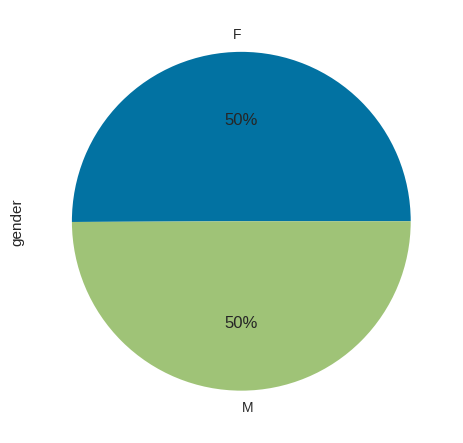

In [31]:
df.gender.value_counts().plot(kind='pie',autopct='%0.0f%%')

Terlihat untuk persentase antara laki-laki dan perempuan sama rata (50-50) walaupun user perempuan (18348) lebih banyak sedikit daripada laki-laki (18298)

In [9]:
#melihat rentang waktu pada dataset
df.joining_date.describe()

count                   37010
unique                   1096
top       2015-06-02 00:00:00
freq                       55
first     2015-01-01 00:00:00
last      2017-12-31 00:00:00
Name: joining_date, dtype: object

Rentang waktu pada data ini: 1 Januari 2015 sampai 31 Desember 2017

In [42]:
#menambah kolom baru yang berisikan tahun user pertama kali bertransaksi
df['year_joining_date']=pd.to_datetime(df['joining_date']).dt.year

In [53]:
df.groupby('year_joining_date')[['avg_transaction_value']].aggregate(['sum','count'])

avg_transaction_value       
                                    sum  count
year_joining_date                             
2015                       3.607159e+08  12304
2016                       3.553851e+08  12161
2017                       3.672717e+08  12545

Terlihat penghasilan dari perusahaan ini paling banyak di tahun 2017 dan terdapat sedikit penurunan pada tahun 2016 dari tahun sebelumnya, hal ini karena berkurangnya jumlah transaksi pada tahun tersebut, namun ada kenaikan jumlah transaksi di tahun berikutnya sehingga menaikkan pendapatan perusahaan

In [27]:
#menambah kolom baru yang berisikan bulan user pertama kali bertransaksi
df['month_joining_date'] = pd.to_datetime(df['joining_date']).dt.month

<Axes: title={'center': 'Pendapatan Tiap Bulan dari tahun 2015-2017'}, xlabel='Bulan', ylabel='Pendapatan'>

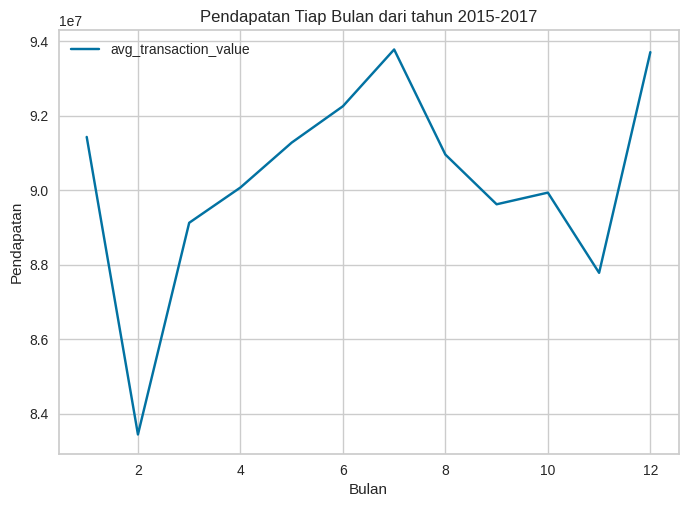

In [55]:
df.groupby('month_joining_date')[['avg_transaction_value']].sum().plot(kind='line',title='Pendapatan Tiap Bulan dari tahun 2015-2017',xlabel='Bulan',ylabel='Pendapatan')

Terlihat pada bulan 7 dan 12 (Juli dan Desember), ketika total pendapatannya dijumlahkan dari tahun 2015-2017, memiliki pendapatan yang paling tinggi dari bulan-bulan lainnya, hal ini mungkin bisa terjadi karena bertepatan dengan diskon tengah dan akhir tahun sehingga menaikkan volume penjualan atau bisa juga karena terdapat liburan tengah (summer holidays) dan akhir tahun (end-of-year holidays) sehingga orang-orang banyak yang berbelanja

In [62]:
df.groupby('age')[['avg_transaction_value']].mean().sort_values(by='avg_transaction_value',ascending=False).head(5)

,avg_transaction_value
age,
27,32086.367663
45,30764.437147
40,30644.003583
30,30240.987750
49,30224.198490


Berikut top 5 usia user yang paling sering bertransaksi pada perusahaan ini yaitu yang berumur 27, 45, 40, 30 dan 49

[Text(0.5, 1.0, 'Perilaku User Berdasarkan Usia')]

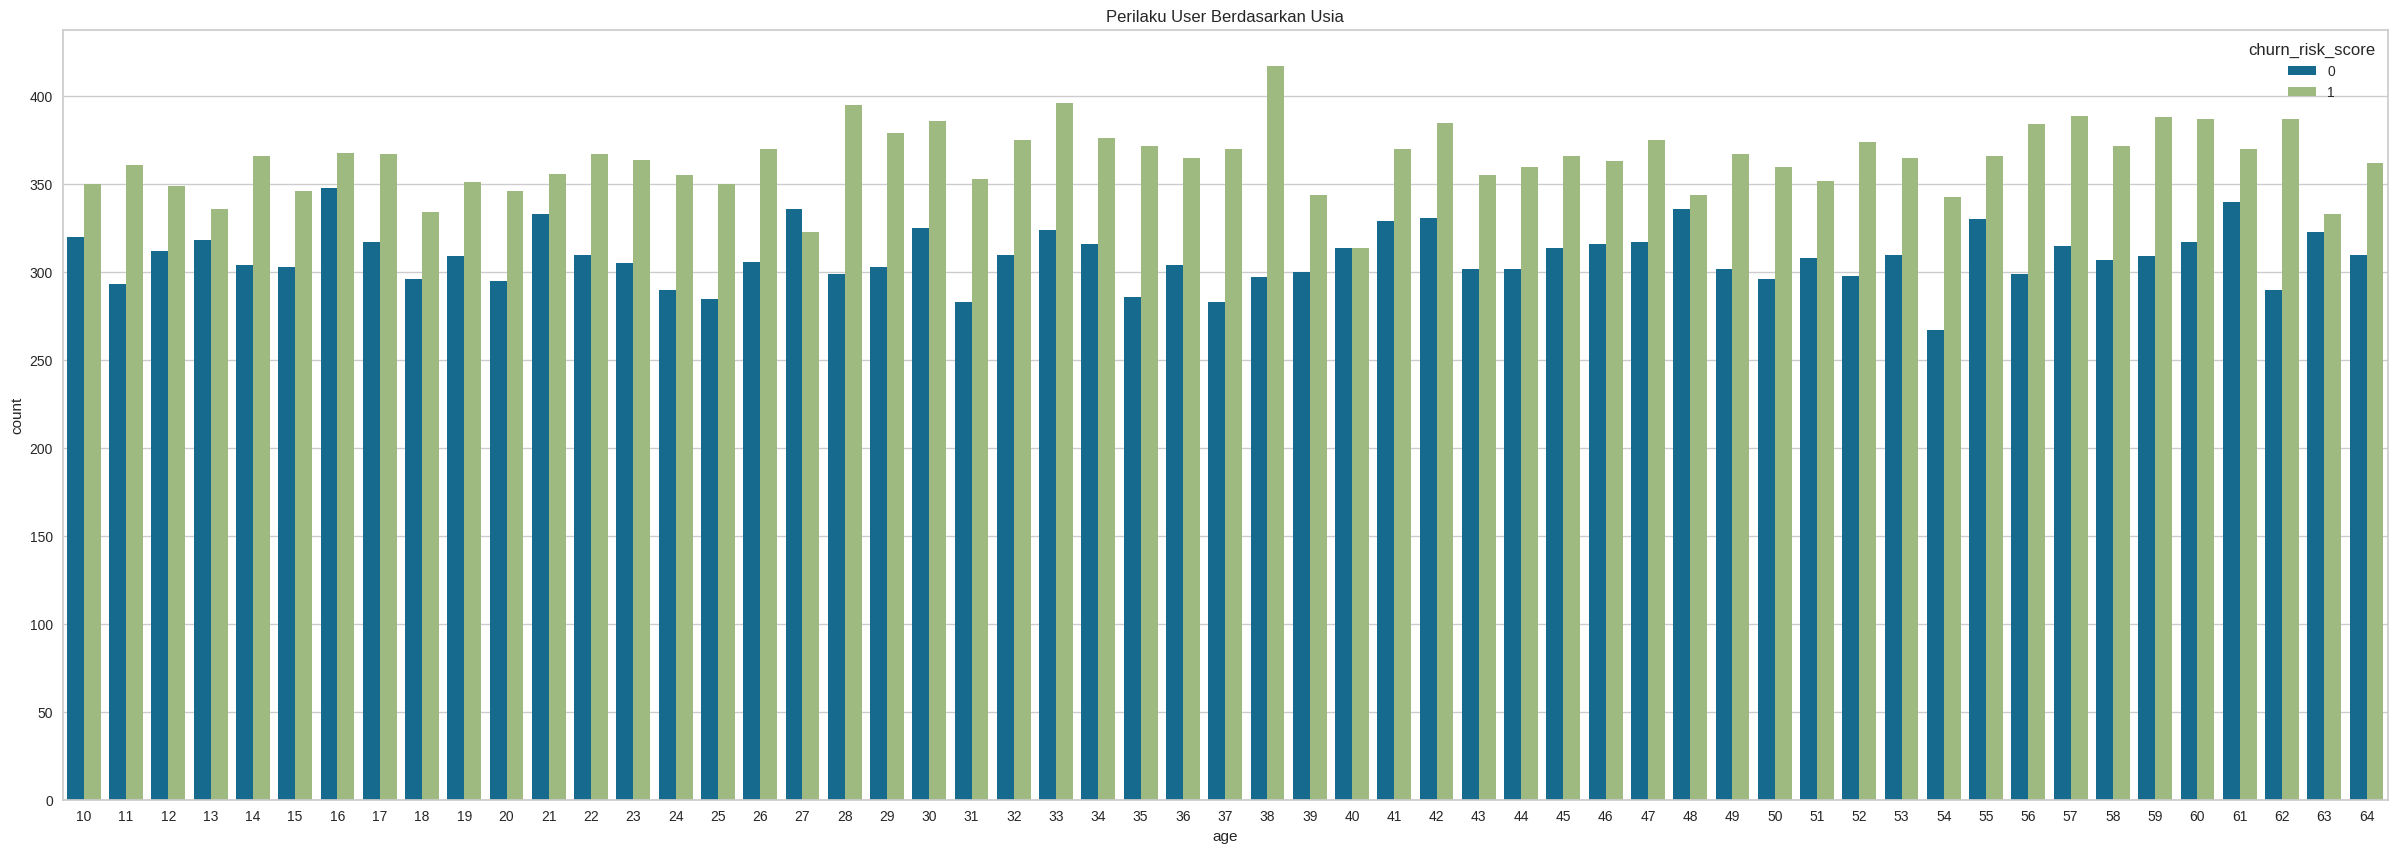

In [58]:
plt.figure(figsize=[30, 10])
sns.countplot( data = df,x = 'age', hue = 'churn_risk_score').set(title='Perilaku User Berdasarkan Usia')

User yang berumur 27 tahun adalah satu-satunya kategori umur yang memiliki nilai churn lebih rendah daripada not churn dimana hal ini harus dipertahankan. User yang berumur 38 tahun adalah user yang paling banyak berhenti memakai produk (churn), dimana hal ini bisa menjadi perhatian perusahaan karena sebenarnya user-user yang berusia paruh baya (30-50 tahun) banyak melakukan transaksi di perusahaan ini.

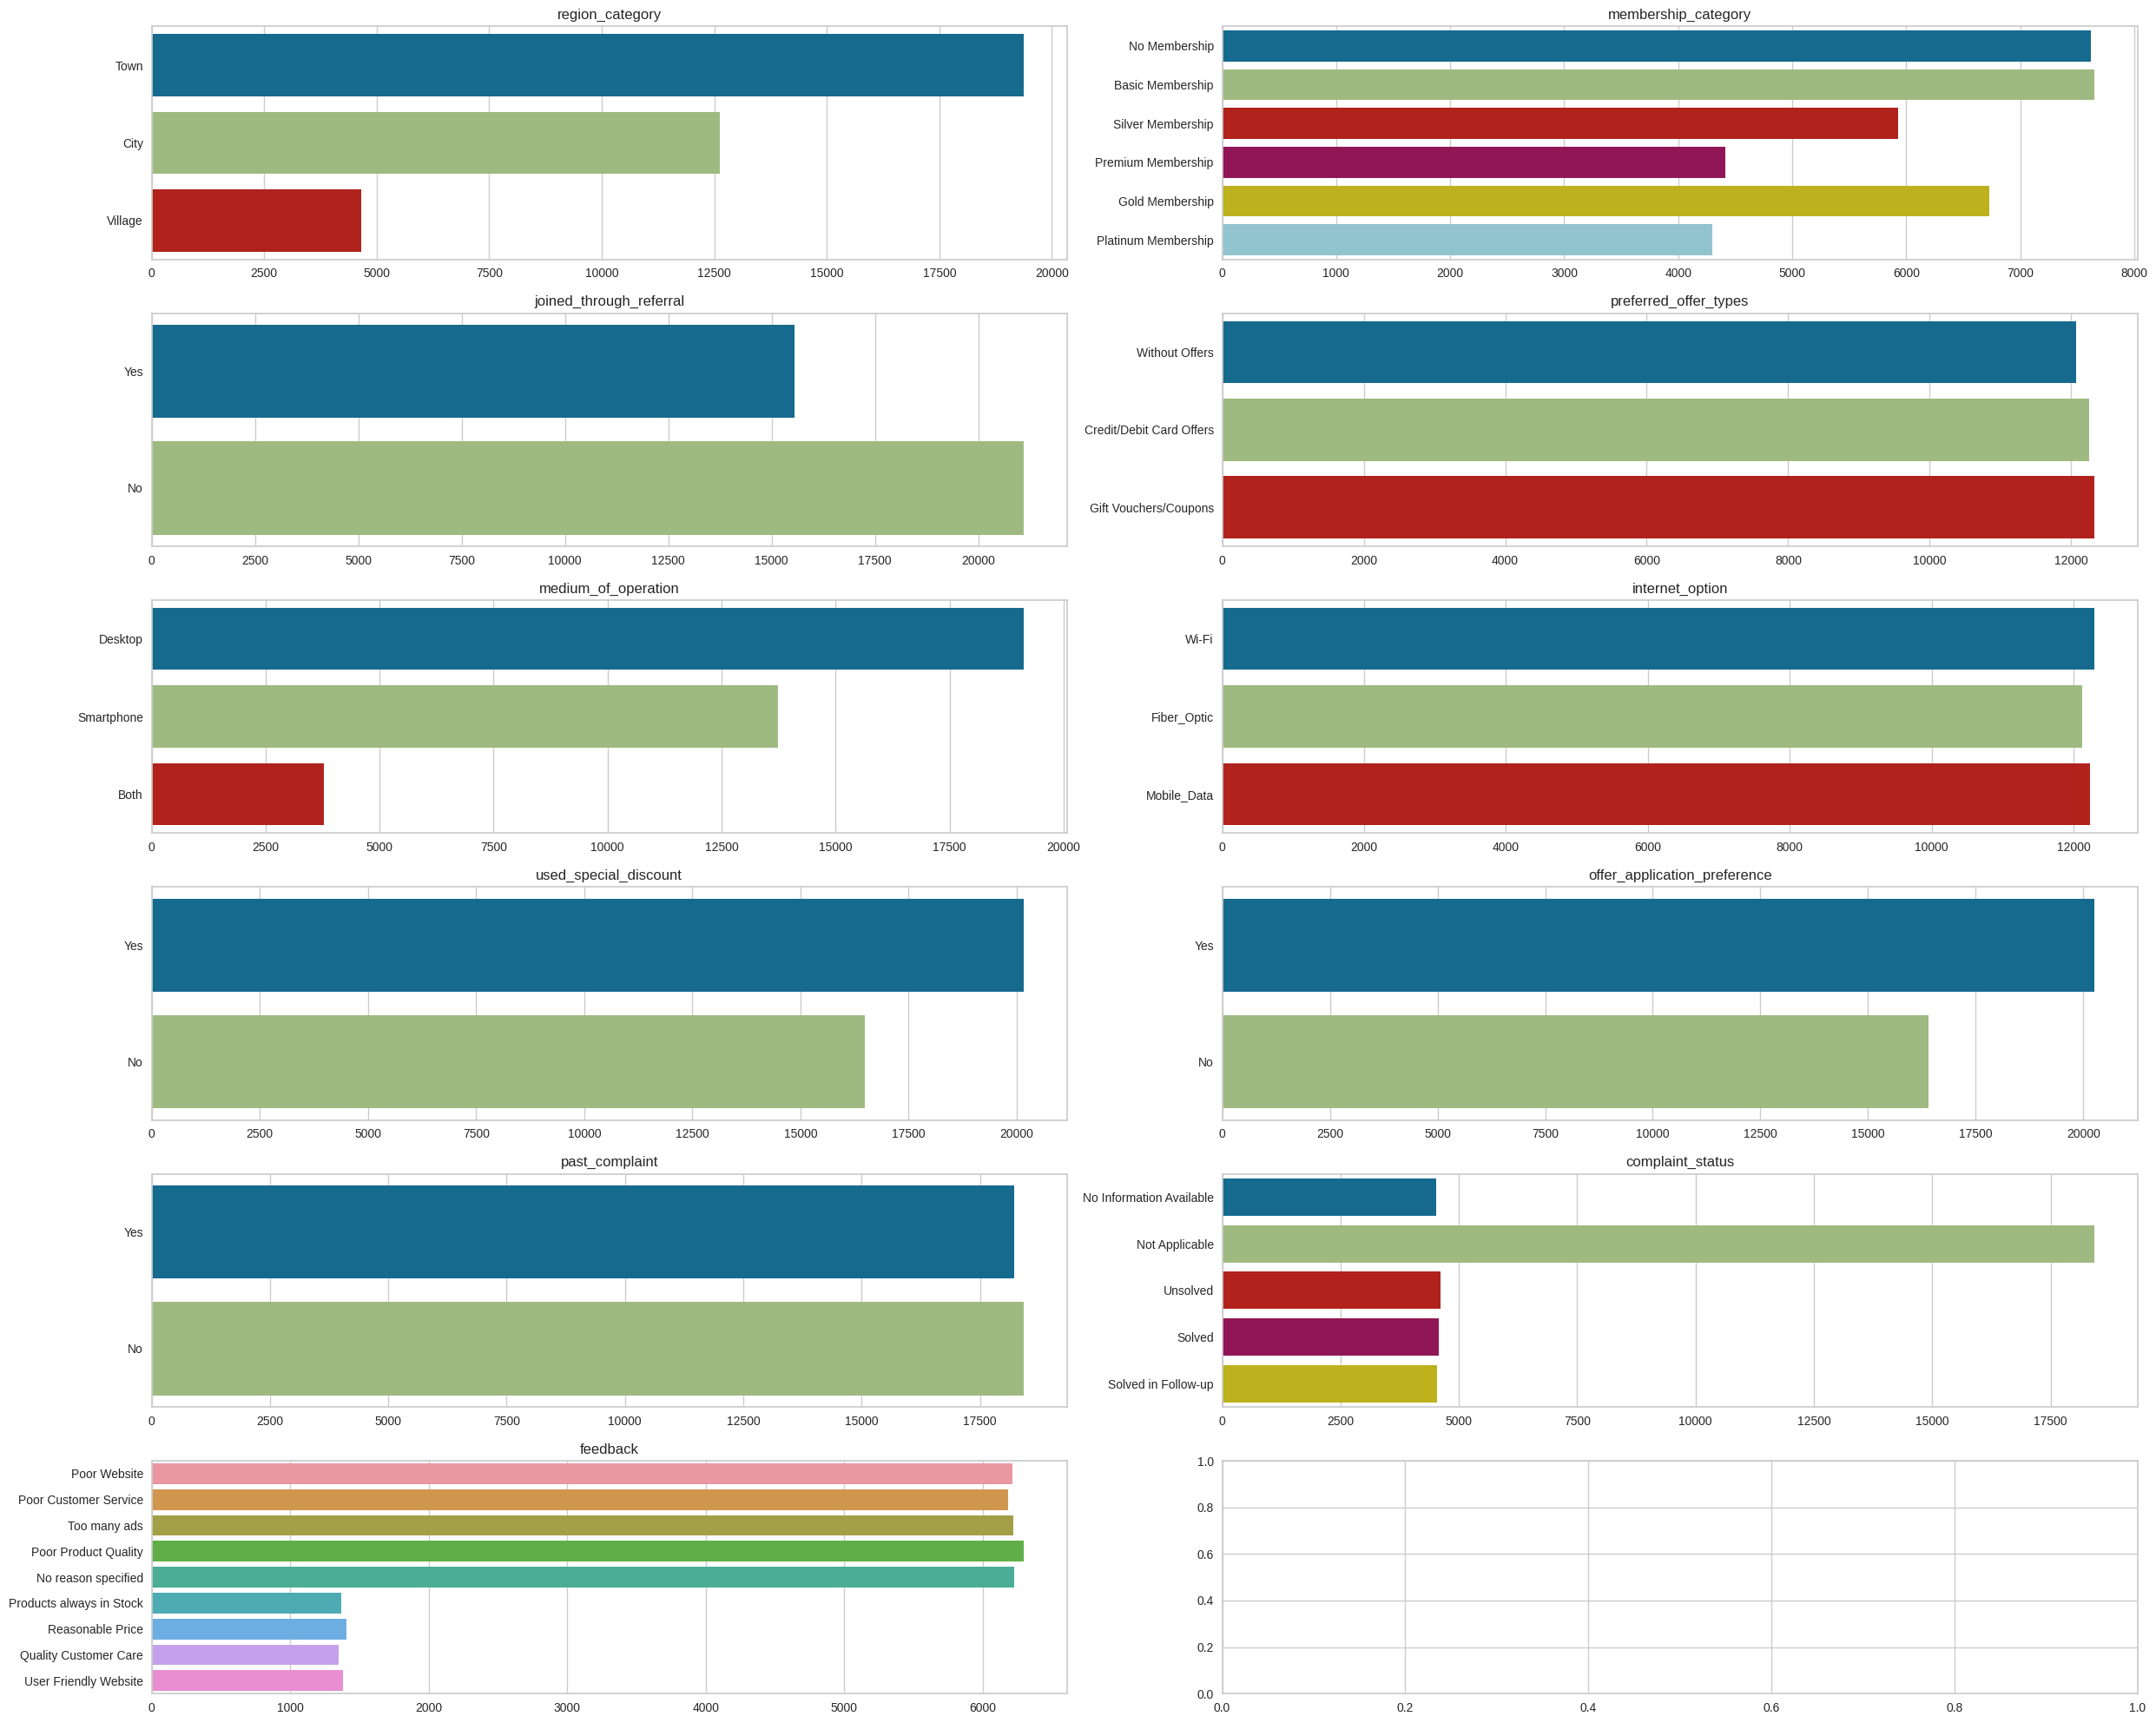

In [32]:
#membuat plot untuk melihat jumlah kategori pada fitur-fitur terpilih menggunakan for loop
fig, axes = plt.subplots(6, 2, figsize=(25, 20))

for i, ax in zip(df[['region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']], axes.flatten()):
    sns.countplot(y=i, data=df, ax=ax)
    ax.set_title(i)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

Pada grafik diatas yang menjadi perhatian, terlihat bahwa rata-rata feedback yang diberikan user kebanyakan berupa negative feedback seperti website yang buruk, customer service yang buruk, terlalu banyak iklan dan kualitas produk yang buruk. Hal inilah yang bisa membuat para user mempertimbangkan apakah mereka akan berhenti menggunakan produk ini atau tidak (akan churn atau tidak) walaupun pada grafik ini bisa terlihat juga bahwa sebenarnya perusahaan ini memiliki lumayan banyak loyal customer yang bisa dilihat dari level membership-nya

In [33]:
#mengelompokan level membership berdasarkan poin yang didapatkan user
df.groupby('membership_category')[['points_in_wallet']].mean().sort_values(by='points_in_wallet')

,points_in_wallet
membership_category,
No Membership,562.358914
Basic Membership,564.432673
Silver Membership,645.988049
Gold Membership,657.508787
Premium Membership,686.753710
Platinum Membership,688.952893


Level membership ditentukan berdasarkan poin yang telah dikumpulkan user, dimana level terendah adalah 'No Membership' dan level tertinggi adalah 'Platinum Membership'

In [34]:
#melihat data kategorik user yang not churn (0)
df[df['churn_risk_score']==0][catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,16819,16819,a6aa19b1580eed4e,1,NaT,NaT
gender,16819,2,M,8443,NaT,NaT
region_category,16819,3,Town,8830,NaT,NaT
membership_category,16819,6,Premium Membership,4416,NaT,NaT
joining_date,16819,1096,2016-01-03 00:00:00,30,2015-01-01,2017-12-31
joined_through_referral,16819,2,No,9936,NaT,NaT
preferred_offer_types,16819,3,Gift Vouchers/Coupons,5959,NaT,NaT
medium_of_operation,16819,3,Desktop,8847,NaT,NaT
internet_option,16819,3,Wi-Fi,5707,NaT,NaT
last_visit_time,16819,15256,17:11:53,4,NaT,NaT


Berikut merupakan data karakteristik user yang not churn kebanyakan adalah laki-laki dan biasanya user-user tersebut sudah premium membership. Feedback utama mereka yaitu karena kebanyakan iklan pada website.

In [35]:
#melihat data kategorik user yang churn (1)
df[df['churn_risk_score']==1][catlist_eda].describe().T

,count,unique,top,freq,first,last
user_id,19827,19827,9f420209e7d129f3,1,NaT,NaT
gender,19827,2,F,9972,NaT,NaT
region_category,19827,3,Town,10537,NaT,NaT
membership_category,19827,4,Basic Membership,7399,NaT,NaT
joining_date,19827,1096,2015-06-02 00:00:00,35,2015-01-01,2017-12-31
joined_through_referral,19827,2,No,11157,NaT,NaT
preferred_offer_types,19827,3,Without Offers,6869,NaT,NaT
medium_of_operation,19827,3,Desktop,10273,NaT,NaT
internet_option,19827,3,Mobile_Data,6632,NaT,NaT
last_visit_time,19827,17690,08:05:14,4,NaT,NaT


Berikut merupakan data karakteristik user yang memiliki potensi untuk churn kebanyakan dari mereka adalah perempuan dan biasanya user-user tersebut masih menjadi basic membership. Salah satu perbedaan dari user yang churn dan not churn adalah user-user yang memiliki potensi churn biasanya sudah pernah memiliki histori pernah komplain mengenai suatu produk (past_complaint) dan feedback utama yang mereka berikan adalah buruknya kualitas produk.

### Korelasi

In [36]:
#membuat variabel baru dari df
df2 = df.copy()

In [37]:
#membuang kolom-kolom yang tidak digunakan
df2.drop(['user_id','joining_date','last_visit_time'],axis=1,inplace=True)

Dikarenakan pada saat pengecekan korelasi menggunakan phik matrix awalnya muncul error ini:

'TerminatedWorkerError: a worker process managed by the executor was unexpectedly terminated. this could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the operating system to kill the worker. The exit codes of the workers are {sigkill(-9)}'

Maka salah satu solusinya adalah mengurangi size dari datasetnya (sumber: https://medium.com/@hangyulson1004/my-experience-based-tips-to-improve-profit-by-19-using-hyperparameter-optimization-on-a-trading-944cf534aec7)


In [38]:
#melihat korelasi antara kolom churn_risk_score dengan variabel lainnya menggunakan phik matrix
phik_score = df2.phik_matrix().churn_risk_score
phik_score.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
used_special_discount           0.013849
region_category                 0.012242
past_complaint                  0.011981
medium_of_operation             0.010742
complaint_status                0.003034
internet_option                 0.002008
gender                          0.000000
age                             0.000000
days_since_last_login                NaN
Name: churn_risk_score, dtype: float64

Matriks phi-k (φk), juga dikenal sebagai matriks korelasi atau tabel kontingensi, adalah tools yang berguna dalam ilmu data science untuk menganalisis hubungan antara variabel kategorikal. (sumber: https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)

- Berdasarkan phik matrix, fitur yang paling berkorelasi dengan target (churn_risk_score) adalah membership_category, fitur-fitur yang lumayan berkorelasi dengan target adalah feedback, points_in_wallet, avg_transaction_value dan avg_frequency_login_days
- Namun karena pada EDA, terdapat kejanggalan pada fitur avg_frequency_login_days, maka fitur ini tidak akan digunakan pada pembuatan model
- Untuk fitur gender, age dan days_since_last_login akan dihilangkan karena tidak ada korelasi dengan kolom target
- Untuk fitur-fitur yang ada sedikit korelasi dengan target, tidak akan ikut terpilih karena berdasarkan EDA, fitur-fitur / kolom-kolom tersebut tidak begitu berpengaruh pada target (antara kelas 0 dan kelas 1 tidak ada perbedaan yang bermakna)

Fitur final yang terpilih adalah: **membership_category, feedback, points_in_wallet**, dan **avg_transaction_value**

# V. Feature Engineering / Pre-Processing

In [39]:
#feature selection
df3 = df2.iloc[:,[3,10,12,17,18]]

In [40]:
#final feature
df3.head(3)

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0


In [41]:
#multicollinearity test
def calc_vif(A):
    vif = pd.DataFrame()
    vif["variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
    return(vif)

Membuat function untuk cek nilai VIF / cek apakah ada multikolinearitas antar variabel

In [42]:
#cek nilai vif score pada fitur terpilih
calc_vif(df3.iloc[:,[1,2]])

,variables,VIF
0,avg_transaction_value,2.523297
1,points_in_wallet,2.523297


Multikolinearitas adalah suatu kondisi di mana terdapat korelasi yang kuat antara dua atau lebih variabel bebas dalam sebuah model regresi. Artinya, ada dua atau lebih variabel yang saling berkaitan atau memprediksi satu sama lain dengan kuat, sehingga sulit untuk membedakan efek masing-masing variabel terhadap variabel dependen. (sumber: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=%E2%80%9C,-or&text=VIF%20score%20of%20an%20independent,explained%20by%20other%20independent%20variables.&text=So%2C%20the%20closer%20the%20R,with%20the%20particular%20independent%20variable)

- Nilai VIF > 5 atau 10 menandakan adanya multikolinearitas antara variabel
- Nilai VIF pada kolom-kolom yang terpilih (avg_transaction_value dan points_in_wallet) = < 5, yang artinya sudah tidak ada / hanya sedikit multikolinearitas antara variabel

### Split

In [43]:
#memisahkan fitur dan target
X = df3.drop('churn_risk_score',axis=1) #fitur
y = df3['churn_risk_score'] #target

Melakukan split sehingga didapatkan fitur dan target, dimana fitur-fiturnya adalah **membership_category, feedback, points_in_wallet**, dan **avg_transaction_value** sedangkan untuk target nya yaitu churn_risk_score nya (apakah user akan churn atau tidak)

In [44]:
#melakukan split pada data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #parameter stratify = y, agar proporsi antar kategori sama
#melakukan split pada data train dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state = 42, stratify=y_train)

In [45]:
#memisahkan kolom numerik dan kolom kategorik
numcol = ['avg_transaction_value','points_in_wallet']
catcol = ['membership_category','feedback']

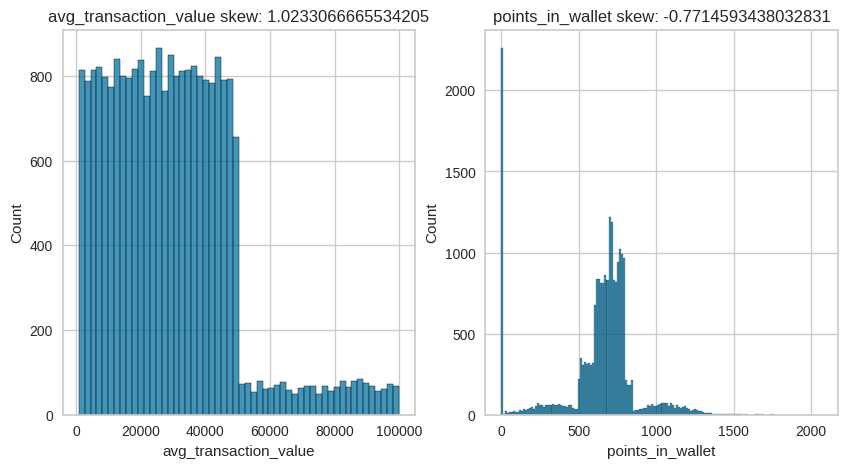

In [46]:
#membuat histogram untuk melihat distribusi dari data numerik
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=[10,5])

for idx, col in enumerate(numcol):
    sns.histplot(X_train[col], ax=ax[idx])
    ax[idx].set_title(f'{numcol[idx]} skew: {X_train[col].skew()}')

Terlihat pada grafik diatas bahwa kolom avg_transactiion_value dan kolom points_in_wallet tidak terdistribusi normal / terdapat skewness (distribusi normal = skewness antara -0.5 dan 0.5), sehingga untuk handle outliers akan menggunakan capping method 'iqr'

In [47]:
#cek outliers pada kolom avg_transaction_value
Q1 = X_train['avg_transaction_value'].quantile(.25)
Q3 = X_train['avg_transaction_value'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = X_train[(X_train['avg_transaction_value'] <= lower) | (X_train['avg_transaction_value'] >= upper)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.0 %
upper:  120514.68
lower:  -65576.3125


Pada kolom avg_transaction_value tidak terdapat outliers (0%)

In [48]:
#cek outliers pada kolom points_in_wallet
Q1 = X_train['points_in_wallet'].quantile(.25)
Q3 = X_train['points_in_wallet'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = X_train[(X_train['points_in_wallet'] <= lower) | (X_train['points_in_wallet'] >= upper)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  10.280573085451135 %
upper:  1304.325
lower:  30.464999999999918


Terdapat outliers pada kolom points_in_wallet sebesar 10.2% maka akan menggunakan capping method = iqr

### Pipeline

In [49]:
#membuat pipeline untuk kolom numerik
num_pipeline = Pipeline([
        ('impute MV', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['avg_transaction_value','points_in_wallet']])

In [50]:
#membuat pipeline untuk kolom kategorik dengan menggunakan one hot encoder
cat_1_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder())
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['feedback']])

In [51]:
#membuat pipeline untuk kolom kategorik dengan menggunakan ordinal encoder
#urutan membership berdasarkan poin yang dikumpulkan
membership_level = ['No Membership', 'Basic Membership', 'Silver Membership','Gold Membership','Premium Membership','Platinum Membership']
cat_2_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[membership_level]))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['membership_category']])

In [52]:
#menggabungkan seluruh pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['avg_transaction_value','points_in_wallet']),
        ("cat_ohe", cat_1_pipeline, ['feedback']),
        ("cat_ord", cat_2_pipeline, ['membership_category'])
    ])

train_tr = full_pipeline.fit_transform(X_train)

In [53]:
#melakukan transformasi pada data validasi dan data test
val_tr = full_pipeline.transform(X_val)
test_tr = full_pipeline.transform(X_test)

# VI. Model Definition

### Pipeline (TensorFlow)

In [54]:
#membuat pipeline tensorflow pada data train, data validasi dan data test
train_pipe_tf = tf.data.Dataset.from_tensor_slices((train_tr, y_train)).batch(64).repeat(3)
val_pipe_tf   = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).batch(64)
test_pipe_tf  = tf.data.Dataset.from_tensor_slices((test_tr, y_test)).batch(64)

In [55]:
#rumus untuk membantu menentukan jumlah neuron pada (1) hidden layer
alp = 10
inp = train_tr.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 180


sumber: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

## Model Sequential

Model sequential adalah salah satu jenis arsitektur model dalam deep learning yang digunakan untuk membangun jaringan saraf tiruan (neural network) dengan urutan layer yang ditentukan. Dalam model sequential, setiap layer dihubungkan secara berurutan, sehingga output dari layer sebelumnya menjadi input dari layer selanjutnya. (sumber: https://towardsdatascience.com/a-comprehensive-introduction-to-tensorflows-sequential-api-and-model-for-deep-learning-c5e31aee49fa)

In [56]:
#define model
model_seq= Sequential()
model_seq.add(Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer = 'uniform'))
model_seq.add(Dense(hid, activation='relu', kernel_initializer = 'uniform')) 
model_seq.add(Dense(out, activation='sigmoid', kernel_initializer = 'uniform'))

#compile
model_seq.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 180)               2340      
                                                                 
 dense_2 (Dense)             (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


- Activation 'relu' = Dalam model sequential, fungsi aktivasi ReLU dapat diimplementasikan pada layer-layer tertentu untuk menambahkan non-linearitas pada model dan membantu meningkatkan kemampuan pembelajaran jaringan saraf tiruan.
- Activation 'sigmoid' = Sigmoid adalah salah satu fungsi aktivasi yang populer digunakan pada jaringan saraf tiruan. Fungsi ini biasanya digunakan pada output layer pada masalah klasifikasi biner, dimana output yang dihasilkan oleh model adalah probabilitas atau skor prediksi untuk kelas positif.
- Pada parameter kernel_initializer, nilai 'uniform' menunjukkan bahwa bobot atau kernel akan diinisialisasi dengan distribusi seragam (uniform distribution) dalam rentang tertentu.
- Loss='binary_crossentropy', fungsi loss yang digunakan adalah binary cross-entropy atau entropi silang biner, yang biasanya digunakan untuk masalah klasifikasi biner atau klasifikasi dengan dua kelas.
- Optimizer='Adam' adalah parameter pada fungsi compile pada TensorFlow/Keras yang menentukan algoritma optimasi yang digunakan selama proses pelatihan jaringan saraf tiruan (neural network).

sumber: https://keras.io/api/models/sequential/

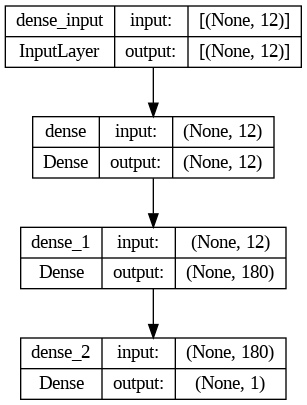

In [57]:
#plot model sequential
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## Model Tuning (Sequential)

In [58]:
#define model (untuk dilakukan tuning)
model_seq_tune = Sequential()
model_seq_tune.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='random_uniform',kernel_regularizer='l2'))
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(hid, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(50, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(10, activation='relu')) 
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dense(out, activation='sigmoid'))

#compile
model_seq_tune.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_seq_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 180)               2340      
                                                                 
 batch_normalization_1 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 50)                9050      
                                                                 
 batch_normalization_2 (Batc  (None, 50)              

Batch Normalization adalah teknik dalam deep learning yang digunakan untuk mengurangi masalah vanishing gradient dan mempercepat pelatihan model. Teknik ini memungkinkan kita untuk menormalkan input pada setiap layer sehingga memudahkan algoritma pembelajaran untuk menemukan solusi yang optimal.
Batch Normalization biasanya diterapkan setelah aktivasi pada setiap layer. (sumber: https://keras.io/api/models/sequential/)

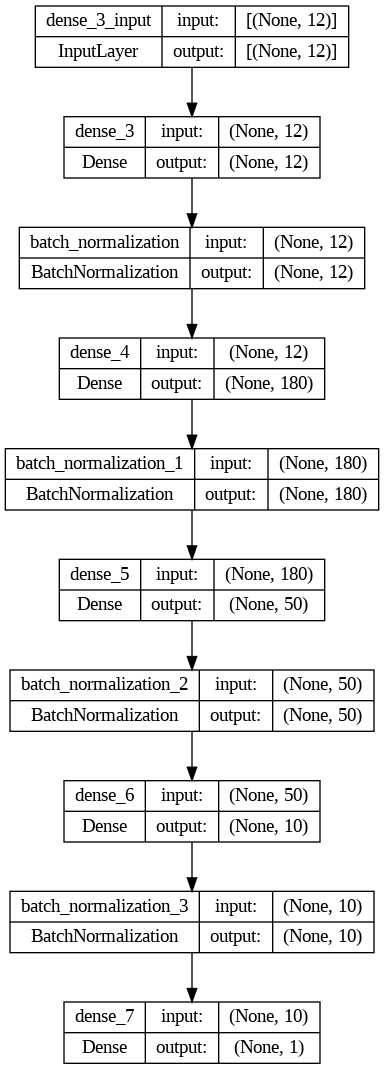

In [59]:
#plot model sequential tuning
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

## Model Functional API

Model Functional API adalah salah satu cara untuk membuat model neural network dalam TensorFlow/Keras yang lebih fleksibel dan dapat menangani kasus-kasus yang lebih kompleks dibandingkan dengan model sequential. Model ini memungkinkan kita untuk membuat model yang memiliki beberapa input/output, dan juga mengizinkan kita untuk membuat model dengan arsitektur yang tidak linier seperti skip connections atau shared layers. (sumber: https://keras.io/guides/functional_api/)

In [60]:
#define model functional API
input_lyr = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layer1 = tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='random_uniform',kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='random_uniform')(layer1)
output_lyr = tf.keras.layers.Dense(out, activation='sigmoid',kernel_initializer='random_uniform')(layer2)

model_func= tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

#compile
model_func.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 180)               2340      
                                                                 
 dense_10 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


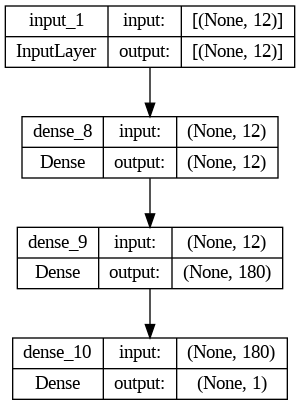

In [61]:
#plot model functional API
tf.keras.utils.plot_model(model_func, show_shapes=True)

## Model Tuning (Functional API)

In [62]:
#define model functional API untuk tuning
input_lyr = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layer1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='random_uniform',kernel_regularizer='l2')(input_lyr)
layer2 = tf.keras.layers.BatchNormalization()(layer1)
layer3 = tf.keras.layers.Dense(hid,activation='relu',kernel_initializer='random_uniform')(layer2)
layer4 = tf.keras.layers.BatchNormalization()(layer3)
layer5 = tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform')(layer4)
layer6 = tf.keras.layers.BatchNormalization()(layer5)
layer7 = tf.keras.layers.Dense(10,activation='relu',kernel_initializer='random_uniform')(layer6)
layer8 = tf.keras.layers.BatchNormalization()(layer7)
output_lyr = tf.keras.layers.Dense(out,activation='sigmoid',kernel_initializer='random_uniform')(layer8)

model_func_tune = tf.keras.models.Model(inputs=input_lyr,outputs=output_lyr)

#compile
model_func_tune.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['Accuracy'])

model_func_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_5 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 50)                9050

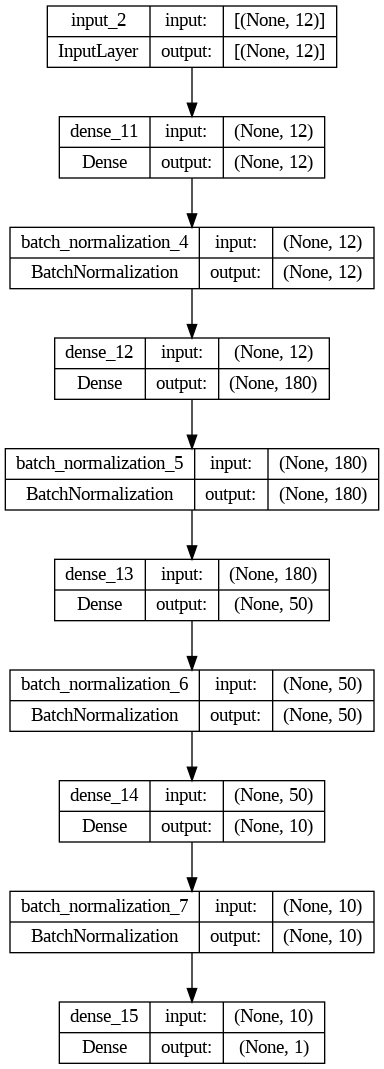

In [63]:
#plot model functional API yang sudah dituning
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

# VII. Model Training

Early stopping adalah teknik yang digunakan dalam deep learning untuk mencegah overfitting pada model dan mempercepat proses pelatihan model. Teknik ini melibatkan penghentian pelatihan model sebelum mencapai jumlah epoch yang ditentukan, berdasarkan kondisi-kondisi tertentu. (sumber: https://keras.io/api/callbacks/early_stopping/)

In [64]:
early_stop = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights= True)

- Monitor='val_loss' pada callback EarlyStopping menandakan bahwa model akan dipantau berdasarkan nilai loss pada data validasi selama pelatihan.

- Patience=5 menandakan bahwa pelatihan akan dihentikan jika nilai loss pada data validasi tidak mengalami penurunan selama 5 epoch berturut-turut. Artinya, jika tidak terjadi penurunan loss pada data validasi selama 5 epoch, maka pelatihan akan dihentikan.

- restore_best_weights=True menandakan bahwa model akan dikembalikan ke keadaan terbaik selama pelatihan, yaitu pada epoch dimana loss pada data validasi paling rendah. Dengan kata lain, jika early stopping terjadi, maka model yang dikembalikan adalah model pada epoch dimana loss pada data validasi paling rendah.

sumber: https://keras.io/api/callbacks/early_stopping/

Dibawah ini adalah proses training untuk model sequential, sequential tuned, functional API dan functional API tuned:

### Model Sequential Training

In [65]:
%%time
train_seq = model_seq.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.3116 - accuracy: 0.8446 - val_loss: 0.2867 - val_accuracy: 0.8469
Epoch 2/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2877 - accuracy: 0.8459 - val_loss: 0.2863 - val_accuracy: 0.8467
Epoch 3/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2875 - accuracy: 0.8460 - val_loss: 0.2861 - val_accuracy: 0.8465
Epoch 4/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2871 - accuracy: 0.8459 - val_loss: 0.2849 - val_accuracy: 0.8465
Epoch 5/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2837 - accuracy: 0.8452 - val_loss: 0.2804 - val_accuracy: 0.8465
Epoch 6/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2790 - accuracy: 0.8449 - val_loss: 0.2743 - val_accuracy: 0.8462
Epoch 7/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2677 - accuracy: 0.8464 - val_loss: 0.2606 - val_accuracy:

## Model Sequential Tuning Training

In [66]:
%%time
train_seq_tuned = model_seq_tune.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 8s 5ms/step - loss: 0.2679 - accuracy: 0.8667 - val_loss: 0.2096 - val_accuracy: 0.9202
Epoch 2/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1935 - accuracy: 0.9195 - val_loss: 0.1805 - val_accuracy: 0.9229
Epoch 3/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.1806 - accuracy: 0.9250 - val_loss: 0.1701 - val_accuracy: 0.9270
Epoch 4/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.1785 - accuracy: 0.9256 - val_loss: 0.1704 - val_accuracy: 0.9272
Epoch 5/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1753 - accuracy: 0.9275 - val_loss: 0.1938 - val_accuracy: 0.9180
Epoch 6/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.1739 - accuracy: 0.9282 - val_loss: 0.1633 - val_accuracy: 0.9309
Epoch 7/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.1727 - accuracy: 0.9287 - val_loss: 0.1661 - val_accuracy:

## Model Functional API Training

In [67]:
%%time
train_func = model_func.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 5s 2ms/step - loss: 0.3180 - accuracy: 0.8443 - val_loss: 0.2945 - val_accuracy: 0.8464
Epoch 2/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2942 - accuracy: 0.8456 - val_loss: 0.2935 - val_accuracy: 0.8462
Epoch 3/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2934 - accuracy: 0.8458 - val_loss: 0.2930 - val_accuracy: 0.8462
Epoch 4/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2929 - accuracy: 0.8459 - val_loss: 0.2927 - val_accuracy: 0.8462
Epoch 5/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2926 - accuracy: 0.8461 - val_loss: 0.2926 - val_accuracy: 0.8458
Epoch 6/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2925 - accuracy: 0.8461 - val_loss: 0.2925 - val_accuracy: 0.8455
Epoch 7/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2923 - accuracy: 0.8461 - val_loss: 0.2924 - val_accuracy:

## Model Functional API Tuning Training

In [68]:
%%time
train_func_tuned = model_func_tune.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf, callbacks=early_stop)

Epoch 1/50
1101/1101 [==============================] - 8s 4ms/step - loss: 0.2733 - Accuracy: 0.8801 - val_loss: 0.1800 - val_Accuracy: 0.9256
Epoch 2/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.1861 - Accuracy: 0.9219 - val_loss: 0.1707 - val_Accuracy: 0.9267
Epoch 3/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1802 - Accuracy: 0.9245 - val_loss: 0.1668 - val_Accuracy: 0.9289
Epoch 4/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.1781 - Accuracy: 0.9254 - val_loss: 0.1635 - val_Accuracy: 0.9320
Epoch 5/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1777 - Accuracy: 0.9253 - val_loss: 0.1647 - val_Accuracy: 0.9306
Epoch 6/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.1770 - Accuracy: 0.9254 - val_loss: 0.1641 - val_Accuracy: 0.9309
Epoch 7/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.1761 - Accuracy: 0.9260 - val_loss: 0.1626 - val_Accuracy:

# VIII. Model Evaluation

## Sequential Evaluation

In [69]:
history_seq_df = pd.DataFrame(train_seq.history)

<Axes: >

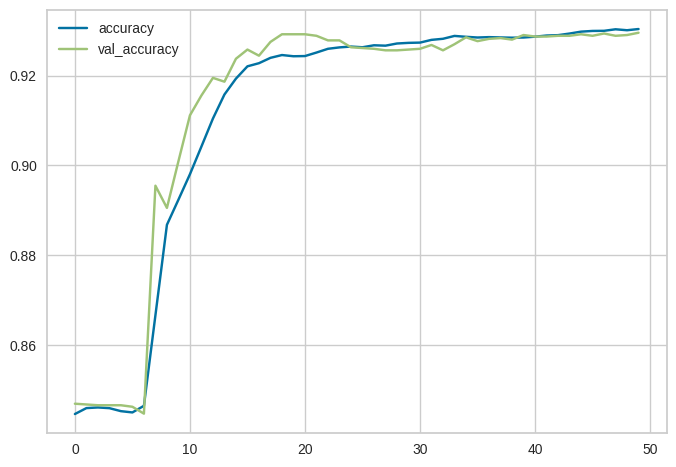

In [70]:
history_seq_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

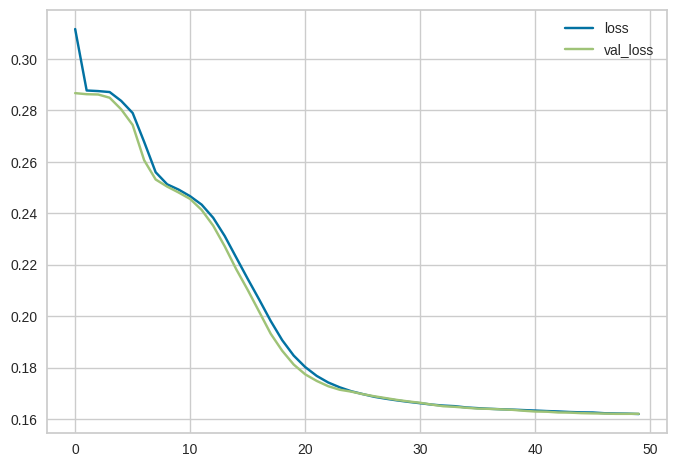

In [71]:
history_seq_df[['loss', 'val_loss']].plot()

In [72]:
y_pred_seq = model_seq.predict(test_tr)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq))

230/230 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3364
           1       0.93      0.94      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'True Label')

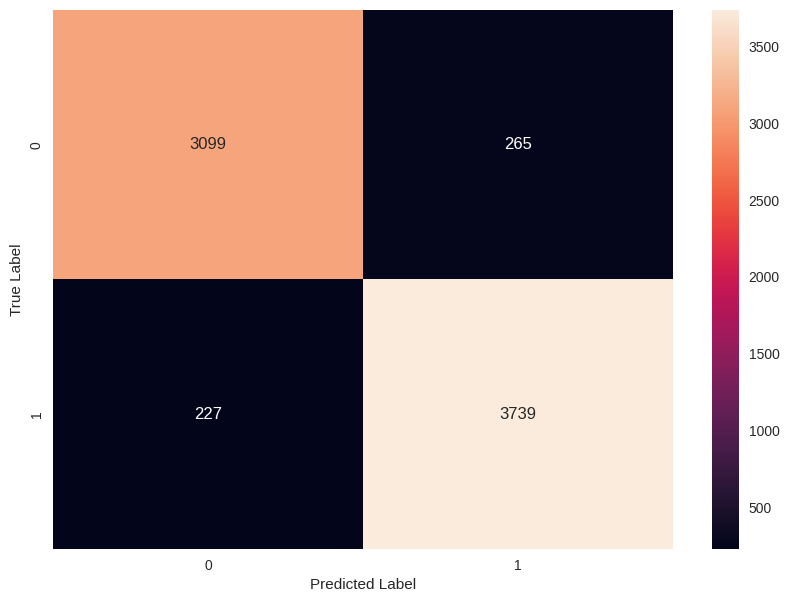

In [73]:
cm_seq = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## Sequential Tuning Evaluation

In [74]:
history_seq_tuned_df = pd.DataFrame(train_seq_tuned.history)

<Axes: >

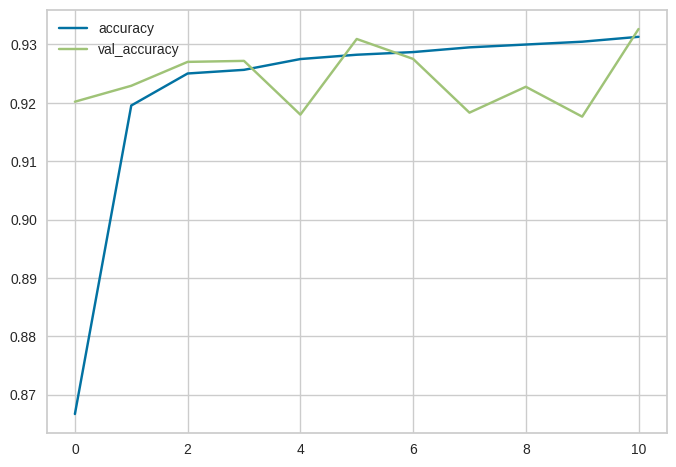

In [75]:
history_seq_tuned_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

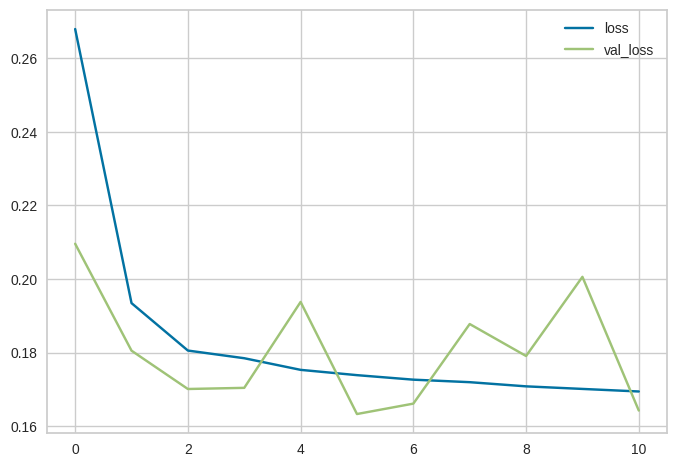

In [76]:
history_seq_tuned_df[['loss', 'val_loss']].plot()

In [77]:
y_pred_seq_tuned = model_seq_tune.predict(test_tr)
y_pred_seq_tuned = np.where(y_pred_seq_tuned >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tuned))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3364
           1       0.96      0.91      0.93      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'True Label')

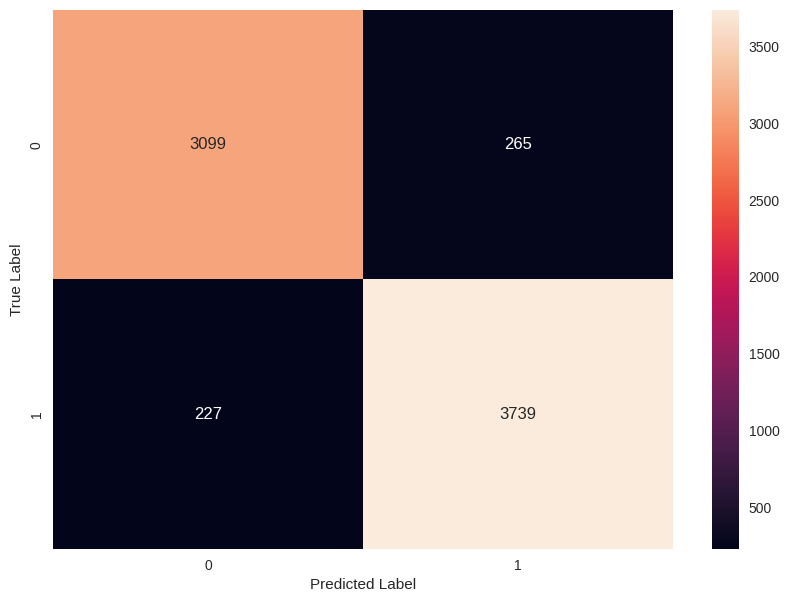

In [78]:
cm_seq_tuned = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tuned)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

**Sequential vs Sequential Tuning:**

Perbedaan antara model sequential sebelum dan sesudah dituning berada pada waktu training nya dimana model sequential sebelum dilakukan training membutuhkan waktu sekitar 2 menit sedangkan setelah dituning hanya membutuhkan waktu 56 detik, sehingga setelah dituning, proses trainingnya jadi lebih cepat walaupun nilai akurasi dari keduanya sama yaitu 0.93 / 93%

## Functional API Evaluation

In [79]:
history_func_df = pd.DataFrame(train_func.history)

<Axes: >

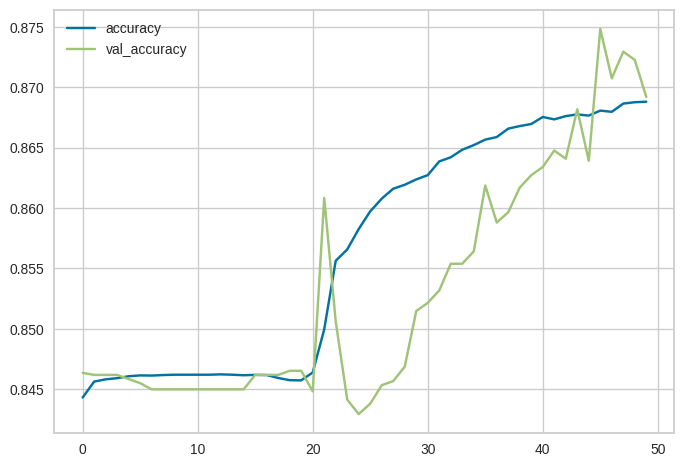

In [80]:
history_func_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

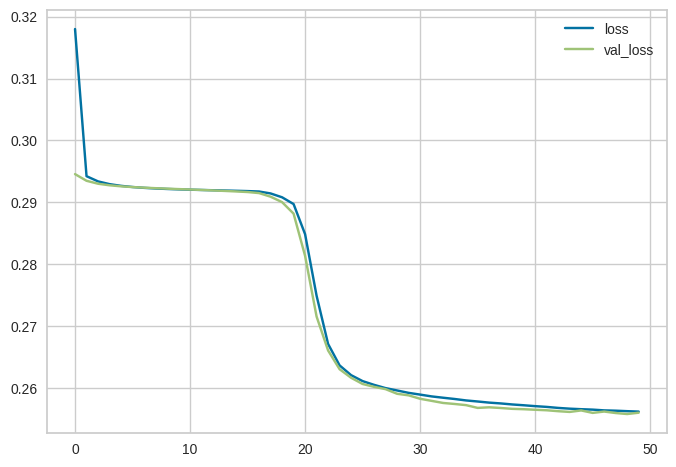

In [81]:
history_func_df[['loss', 'val_loss']].plot()

In [82]:
y_pred_func = model_func.predict(test_tr)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      3364
           1       0.82      0.97      0.89      3966

    accuracy                           0.87      7330
   macro avg       0.89      0.86      0.86      7330
weighted avg       0.88      0.87      0.87      7330



Text(95.72222222222221, 0.5, 'True Label')

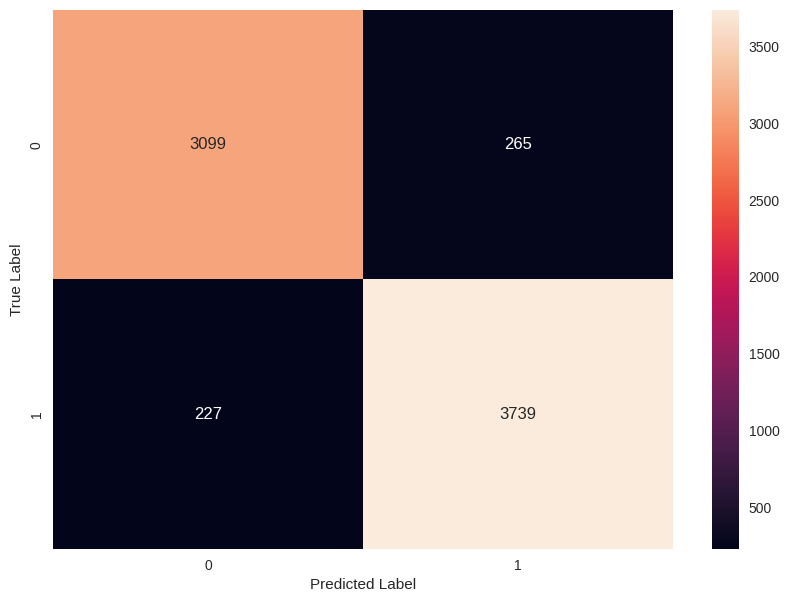

In [83]:
cm_func = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## Functional API Tuning Evaluation

In [84]:
history_func_tuned_df = pd.DataFrame(train_func_tuned.history)

<Axes: >

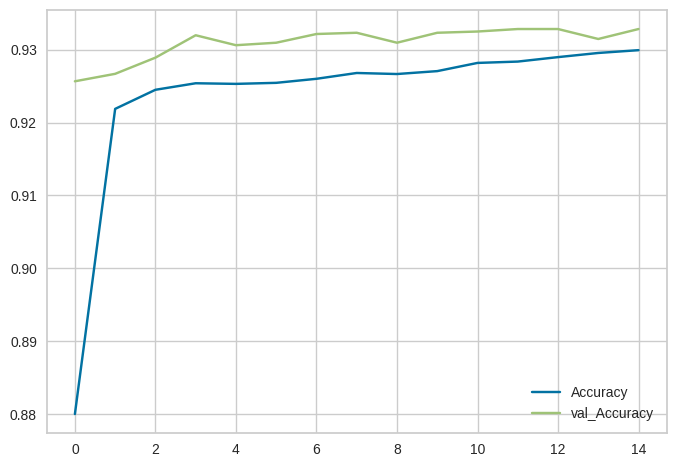

In [85]:
history_func_tuned_df[['Accuracy', 'val_Accuracy']].plot()

<Axes: >

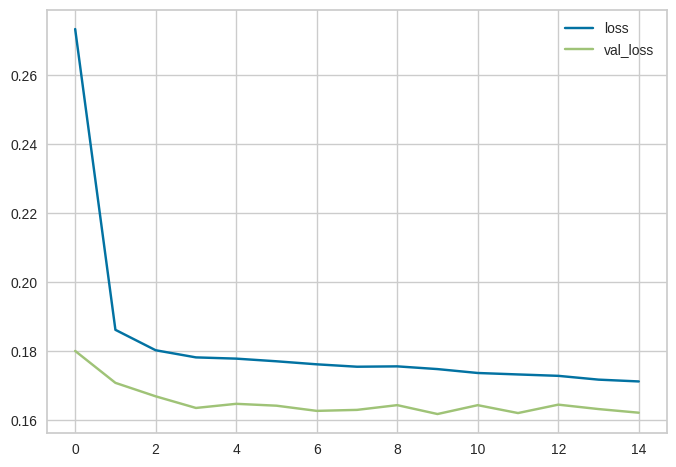

In [86]:
history_func_tuned_df[['loss', 'val_loss']].plot()

In [87]:
y_pred_func_tuned = model_func_tune.predict(test_tr)
y_pred_func_tuned = np.where(y_pred_func_tuned >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tuned))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3364
           1       0.95      0.93      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.94      0.93      7330
weighted avg       0.94      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'True Label')

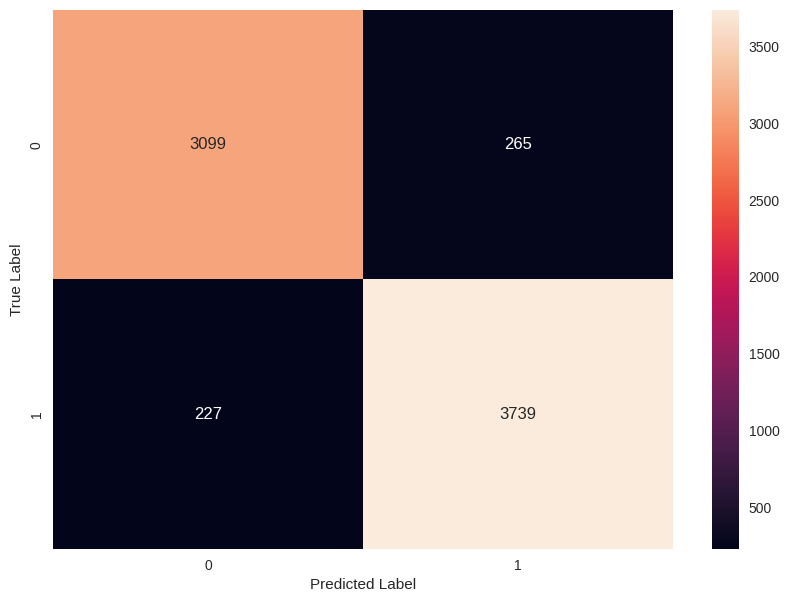

In [88]:
cm_func_tuned = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tuned)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

**Functional API vs Functional API Tuning:**

Terlihat dari nilai akurasi pada model functional API sebelum dilakukan tuning adalah 0.87/87% sedangkan setelah dituning mengalami kenaikan menjadi 0.93/93% sehingga terlihat adanya improvement setelah dilakukan tuning, selain itu untuk proses trainingnya juga terdapat perbedaan dimana sebelum dituning, proses training yang dibutuhkan adalah 2.5 menit sedangkan setelah dituning menjadi 1.5 menit (perbedaan 1 menit)

# IX. Model Saving

In [89]:
#save pipeline pada saat preprocessing
with open('full_pipeline.pkl', 'wb') as file_1:
  joblib.dump(full_pipeline, file_1)

In [90]:
#save model funtional API tuning
model_func_tune.save('model_churn.h5')

# XI. Conclusion

- Pada kasus ini, yang paling menjadi perhatian adalah banyaknya feedback negative dari user entah karena kualitas produk yang buruk, websitenya yang buruk, kebanyakan iklan gdan sebagainya sehingga hal-hal tersebut perlu dievaluasi kembali oleh perusahaan agar mengurangi tingkat churn / loyalitas dari user walaupun semakin tinggi level membership dari user sebenarnya tidak akan begitu mempengaruhi tingkat churn namun sebagai perusahaan sebaiknya terus melakukan improvement untuk menjaga kredibilitas.

- Bisa memfokuskan untuk membuat marketing strategi untuk user-user paruh baya agar mereka bisa lebih loyal terhadap produk-produk perusahaan karena dilihat dari total transaksi perusahaan, user-user tersebut merupakan salah satu sumber pendapatan perusahaan terbanyak, salah satu caranya mungkin bisa dengan membuat acara di suatu komunitas.

- Untuk perbedaan dari model sequential sebelum dan sesudah dituning adalah dari segi waktu trainingnya dimana model setelah dituning bisa mendapatkan nilai akurasi yang sama dengan yang sebelum dilakukan tuning yaitu 0.93 tetapi dengan waktu training yang lebih cepat (56 detik > 2.5 menit).

- Untuk perbedaan dari model functional api sebelum dan sesudah dituning adalah dari nilai akurasi dan kecepatan waktu trainingnya, sebelum dilakukan tuning didapatkan akurasi sebesar 0.87 dan kecepatan training 2.5 menit sedangkan setelah dituning, nilai akurasinya menjadi 0.93 dengan kecepatan training nya adalah 1.5 menit.

- Pada kasus ini model yang terbaik dan yang digunakan adalah model Functional API (yang sudah dilakukan tuning) karena memiliki tingkat akurasi yang baik yaitu 0.93 dan waktu training yang lumayan cepat (1,5 menit) walaupun sebenarnya model sequential yang sudah dituning waktu trainingnya lebih cepat yaitu 56 detik namun terlihat pada grafik untuk data validasi terdapat exploding gradient sehingga menyebabkan pembelajaran menjadi tidak stabil dan tidak konvergen (exploding gradient mengacu pada masalah yang terjadi ketika nilai gradien yang dihitung pada layer-layer awal dari jaringan saraf dalam proses backpropagation menjadi sangat besar). Model Functional API apabila dibandingkan dengan model sequential yaitu model functional API lebih fleksibel sehingga dapat membuat model yang lebih kompleks dan lebih bervariasi.

- Beberapa improvement yang bisa dibuat: Menggunakan teknik transfer learning: yaitu dengan menggunakan model yang sudah dilatih sebelumnya pada dataset yang berbeda. Dengan melakukan ini, model yang dihasilkan akan memiliki kinerja yang lebih baik dan lebih cepat konvergen. Kemudian bisa dengan meningkatkan jumlah data training kalau pada kasus ini data training yang digunakan yaitu 80% (0.8) dari total data, bisa dinaikkan menjadi 90% (0.9) dengan harapan model dapat berlatih lebih banyak.